## in this notebook we will practice reading and manipulating data and create an image classifier using convolutional nn

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

### read data

data [location](https://www.kaggle.com/zalando-research/fashionmnist)

In [4]:
train = pd.read_csv('data/fashion-mnist_train.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


#### get the features and the labels

In [10]:
xtrain = train.drop('label', axis=1)
xtrain.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [9]:
ytrain = train['label']
ytrain

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

### convert to tensors

In [14]:
xtrain.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
xtraintensor = torch.tensor(xtrain.values, dtype=torch.float32)

In [76]:
xtraintensor.shape

torch.Size([60000, 784])

In [77]:
xtraintensor = xtraintensor.reshape(-1, 28, 28)

In [78]:
xtraintensor.shape

torch.Size([60000, 28, 28])

required shape is [6000, 1, 28, 28]. conv2d expects input in shape (n_samples, channels, height, width). let's reshape

In [128]:
xtraintensor.unsqueeze_(1)

tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0., 

In [129]:
xtraintensor.shape

torch.Size([60000, 1, 28, 28])

In [213]:
ytraintensor = torch.tensor(ytrain.values)

In [214]:
ytraintensor

tensor([2, 9, 6,  ..., 8, 8, 7])

In [215]:
ytraintensor.shape

torch.Size([60000])

In [216]:
from torch.nn.functional import one_hot

In [217]:
ytraintensor = one_hot(ytraintensor)

In [218]:
ytraintensor

tensor([[0, 0, 1,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 1, 0, 0]])

In [219]:
ytraintensor.shape

torch.Size([60000, 10])

In [229]:
ytraintensor = ytraintensor.type(torch.DoubleTensor)

### visualize some images

In [41]:
labelstring = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
                'Ankle boot']

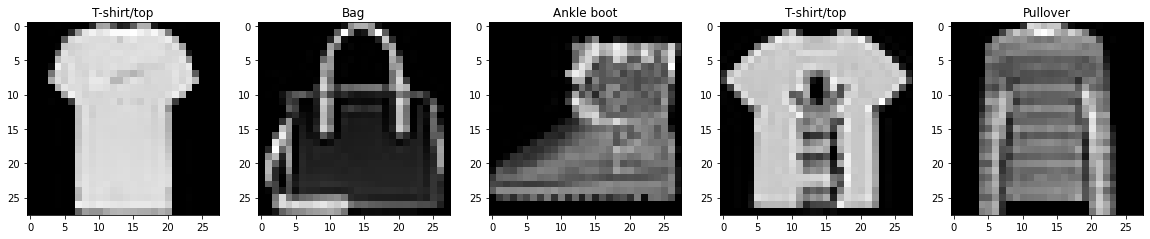

In [51]:
start = 10
fig = plt.figure(figsize=(20,5))
for i,e in enumerate(range(start, start+5)):
    img = xtraintensor[e]
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(labelstring[ytrain[e]])

### visualize one convolution layer and the filters

In [67]:
convtest = nn.Conv2d(1,10,3)

In [68]:
convtest

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))

pass 5 images because the 

In [98]:
outtest = convtest(xtraintensor[0:5].unsqueeze(1))

In [99]:
outtest.shape

torch.Size([5, 10, 26, 26])

In [103]:
outtest[0][0].shape

torch.Size([26, 26])

Text(0.5, 0.98, 'conv 1 outputs')

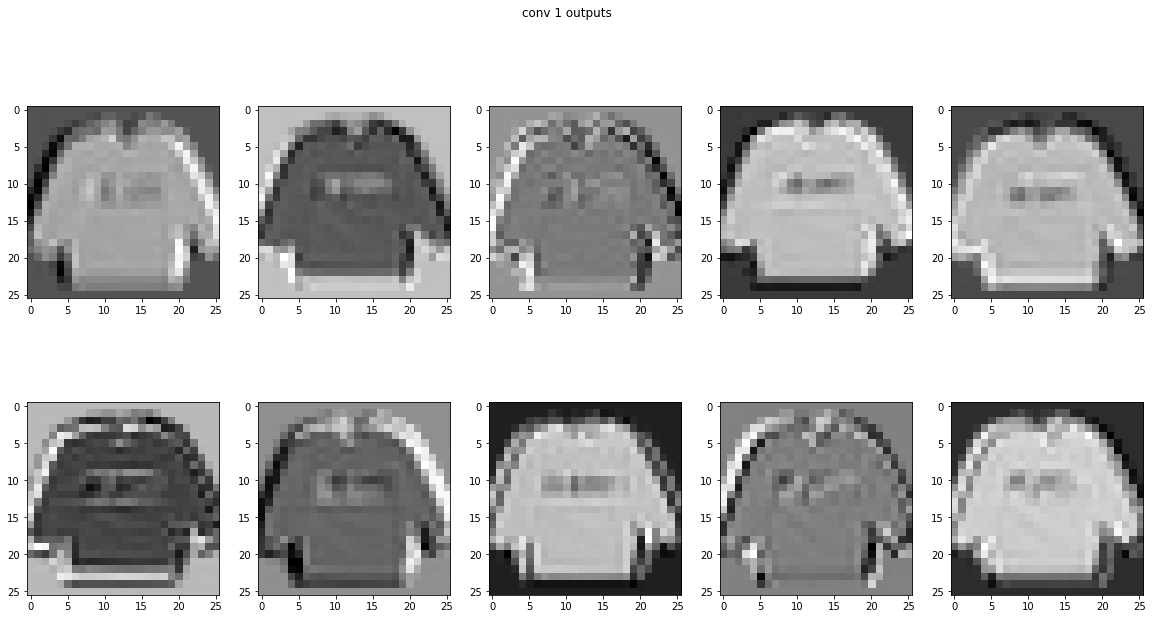

In [116]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(outtest[0][i].detach().numpy(), cmap='gray')
plt.suptitle('conv 1 outputs')

In [114]:
convtest.weight.shape

torch.Size([10, 1, 3, 3])

In [122]:
convtest.weight[0].squeeze().shape

torch.Size([3, 3])

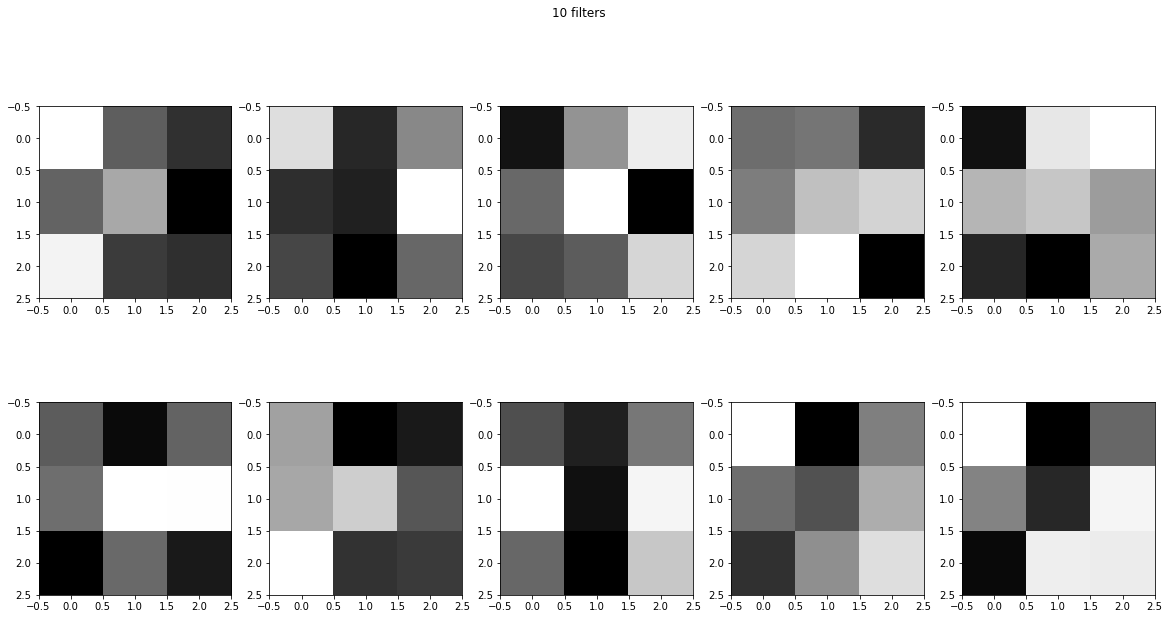

In [126]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(convtest.weight[i].squeeze().detach().numpy(), cmap='gray')
    plt.suptitle('10 filters')

#### see how .view reshapes the ouput of the conv/maxpool layers before it is fed into the linear layer

In [150]:
outtest.shape

torch.Size([5, 10, 26, 26])

In [151]:
outtest.size(0)

5

In [153]:
viewtest = outtest.view(outtest.size(0), -1)
viewtest.shape

torch.Size([5, 6760])

### create the model

In [224]:
class fashMnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(10*13*13, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
#         print(x.shape)
        x = self.pool(x)
#         print(x.shape)
        x = x.view(x.size(0), -1)
#         print(x.shape)
        x = F.log_softmax(self.fc1(x), dim=1)
#         print(x.shape)

        
        return x

In [225]:
model1 = fashMnist()
model1

fashMnist(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1690, out_features=10, bias=True)
)

### set the parameters

In [226]:
batch_size = 64
iterations = xtraintensor.shape[0]//batch_size

In [227]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters())

In [230]:
loss_over_time = []
for i in range(iterations):
    optimizer.zero_grad()
    outputs = model1(xtraintensor[i:i+batch_size])
    loss = criterion(outputs, ytraintensor[i:i+batch_size])
    loss.backward()
    optimizer.step()
    
    loss_over_time.append(loss.item())
    print(f'iteration: {i}, loss: {loss.item()}')

iteration: 0, loss: 47.653884849437866
iteration: 1, loss: 33.86612207352793
iteration: 2, loss: 34.59162019420444
iteration: 3, loss: 41.31248940810235
iteration: 4, loss: 35.39718907131506
iteration: 5, loss: 27.320396986336302
iteration: 6, loss: 25.534539494204623
iteration: 7, loss: 14.437043894026473
iteration: 8, loss: 9.731239844393683
iteration: 9, loss: 10.190923908424498
iteration: 10, loss: 7.82512119900748
iteration: 11, loss: 6.103728034094086
iteration: 12, loss: 6.432755545712912
iteration: 13, loss: 3.8260672583912125
iteration: 14, loss: 2.4256981565908213
iteration: 15, loss: 3.2158519692097727
iteration: 16, loss: 3.434203947384817
iteration: 17, loss: 3.4328312065517737
iteration: 18, loss: 2.873816604142444
iteration: 19, loss: 3.456178052991564
iteration: 20, loss: 2.8877846437402397
iteration: 21, loss: 2.1289045582056327
iteration: 22, loss: 2.0437606332208165
iteration: 23, loss: 2.49258318846999
iteration: 24, loss: 2.9008460638064397
iteration: 25, loss: 2.0

iteration: 210, loss: 1.2113957340333172
iteration: 211, loss: 1.0202296397315713
iteration: 212, loss: 1.707383056800798
iteration: 213, loss: 1.6293121374264237
iteration: 214, loss: 1.4636618479449046
iteration: 215, loss: 1.2957606910926083
iteration: 216, loss: 0.9126010750388822
iteration: 217, loss: 0.7346510841464333
iteration: 218, loss: 0.6339721019988821
iteration: 219, loss: 0.7311974782819561
iteration: 220, loss: 0.7705533493660822
iteration: 221, loss: 0.3829837808362502
iteration: 222, loss: 1.5625000636812816
iteration: 223, loss: 1.9853685382146793
iteration: 224, loss: 1.5131818809059463
iteration: 225, loss: 0.9689118966464305
iteration: 226, loss: 1.3210866545544502
iteration: 227, loss: 1.0653673765845852
iteration: 228, loss: 0.6449789608869726
iteration: 229, loss: 0.2604954389060614
iteration: 230, loss: 0.1163334464838639
iteration: 231, loss: 0.03882341763096153
iteration: 232, loss: 0.016163748728387772
iteration: 233, loss: 0.0792385725614817
iteration: 234

iteration: 418, loss: 0.153931351812453
iteration: 419, loss: 0.1837621866203697
iteration: 420, loss: 0.09755856384228045
iteration: 421, loss: 0.014535129641172873
iteration: 422, loss: 0.6978602482426963
iteration: 423, loss: 3.2645271696079727
iteration: 424, loss: 2.9215089073402716
iteration: 425, loss: 2.4399794283835363
iteration: 426, loss: 1.835567237103986
iteration: 427, loss: 1.9535036670778911
iteration: 428, loss: 1.22296925793556
iteration: 429, loss: 0.5203830149290513
iteration: 430, loss: 0.08484701335178801
iteration: 431, loss: 0.051937802044278114
iteration: 432, loss: 0.1296120656968176
iteration: 433, loss: 0.062259037690129304
iteration: 434, loss: 0.0343087295387825
iteration: 435, loss: 0.01330775192432565
iteration: 436, loss: 0.001233657660792531
iteration: 437, loss: 0.0006458621659408692
iteration: 438, loss: 0.0035876493138689014
iteration: 439, loss: 0.007202893576662817
iteration: 440, loss: 0.003265759991998962
iteration: 441, loss: 0.0007334056402283

iteration: 623, loss: 0.6381007779164953
iteration: 624, loss: 0.43115372035489574
iteration: 625, loss: 0.1772239649741748
iteration: 626, loss: 0.0214072544689613
iteration: 627, loss: 0.003444032336281877
iteration: 628, loss: 0.004598555486637568
iteration: 629, loss: 0.507459156980651
iteration: 630, loss: 0.4851315663720096
iteration: 631, loss: 0.39849122163539197
iteration: 632, loss: 0.25658562857192013
iteration: 633, loss: 0.069187267237238
iteration: 634, loss: 0.09632186168828649
iteration: 635, loss: 0.058757937101631796
iteration: 636, loss: 0.05897823020792714
iteration: 637, loss: 0.006395069890217542
iteration: 638, loss: 0.0017121611353799748
iteration: 639, loss: 0.2858661508791016
iteration: 640, loss: 0.14542923352993498
iteration: 641, loss: 0.00439897956362767
iteration: 642, loss: 0.6351470281571048
iteration: 643, loss: 0.5181361965960045
iteration: 644, loss: 0.4550660037232491
iteration: 645, loss: 0.13310764210154125
iteration: 646, loss: 0.0216528354990430

iteration: 827, loss: 0.011629258709912382
iteration: 828, loss: 0.2739029304390246
iteration: 829, loss: 0.6157058854615627
iteration: 830, loss: 0.4975951366204513
iteration: 831, loss: 0.33847769202703937
iteration: 832, loss: 0.07537439740100405
iteration: 833, loss: 0.00735454004425018
iteration: 834, loss: 0.2335883387520139
iteration: 835, loss: 0.29451297144672484
iteration: 836, loss: 0.349052094346156
iteration: 837, loss: 0.28655366394507586
iteration: 838, loss: 0.2153978777120068
iteration: 839, loss: 0.12752868164154962
iteration: 840, loss: 0.6020796544034107
iteration: 841, loss: 0.5325406779042482
iteration: 842, loss: 0.4585891836739079
iteration: 843, loss: 0.9343901818059129
iteration: 844, loss: 0.8193817412366382
iteration: 845, loss: 0.8290499856372165
iteration: 846, loss: 0.5519756648605432
iteration: 847, loss: 0.3124225235360619
iteration: 848, loss: 0.10869933060178483
iteration: 849, loss: 0.04253785164179802
iteration: 850, loss: 0.4432054641564418
iterati

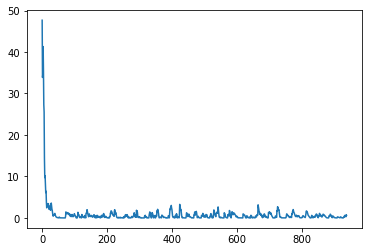

In [231]:
plt.plot(np.arange(0,iterations), loss_over_time)

### get the test data and convert to tensor

In [232]:
test = pd.read_csv('data/fashion-mnist_test.csv')

In [233]:
xtest = test.drop('label', axis=1)
xtest.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [234]:
ytest = test['label']
ytest

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [236]:
xtesttensor = torch.tensor(xtest.values, dtype=torch.float32)

In [240]:
xtesttensor = xtesttensor.reshape(-1, 28, 28)
xtesttensor.shape

torch.Size([10000, 28, 28])

In [241]:
xtesttensor.unsqueeze_(1)

tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   4.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   1.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0., 

In [243]:
xtesttensor.shape

torch.Size([10000, 1, 28, 28])

In [245]:
ytesttensor = torch.tensor(ytest) 

In [246]:
ytesttensor.shape

torch.Size([10000])

In [247]:
ytesttensor = one_hot(ytesttensor)

In [249]:
ytesttensor.shape

torch.Size([10000, 10])

### check if the predicted and the true labels are the same

In [255]:
outtest = model1(xtesttensor[0].unsqueeze(0))

In [256]:
outtest

tensor([[ -0.3800, -60.2332, -58.3353, -20.1168, -56.1223, -98.7023,  -1.1517,
         -68.5149, -47.4240, -97.2770]], grad_fn=<LogSoftmaxBackward0>)

In [260]:
torch.max(outtest.data, 1)

torch.return_types.max(
values=tensor([-0.3800]),
indices=tensor([0]))

In [267]:
ytesttensor[0]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [269]:
torch.argmax(ytesttensor[0]).item()

0

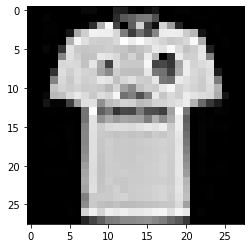

In [264]:
plt.imshow(xtesttensor[0].squeeze(0), cmap='gray')

### test some images

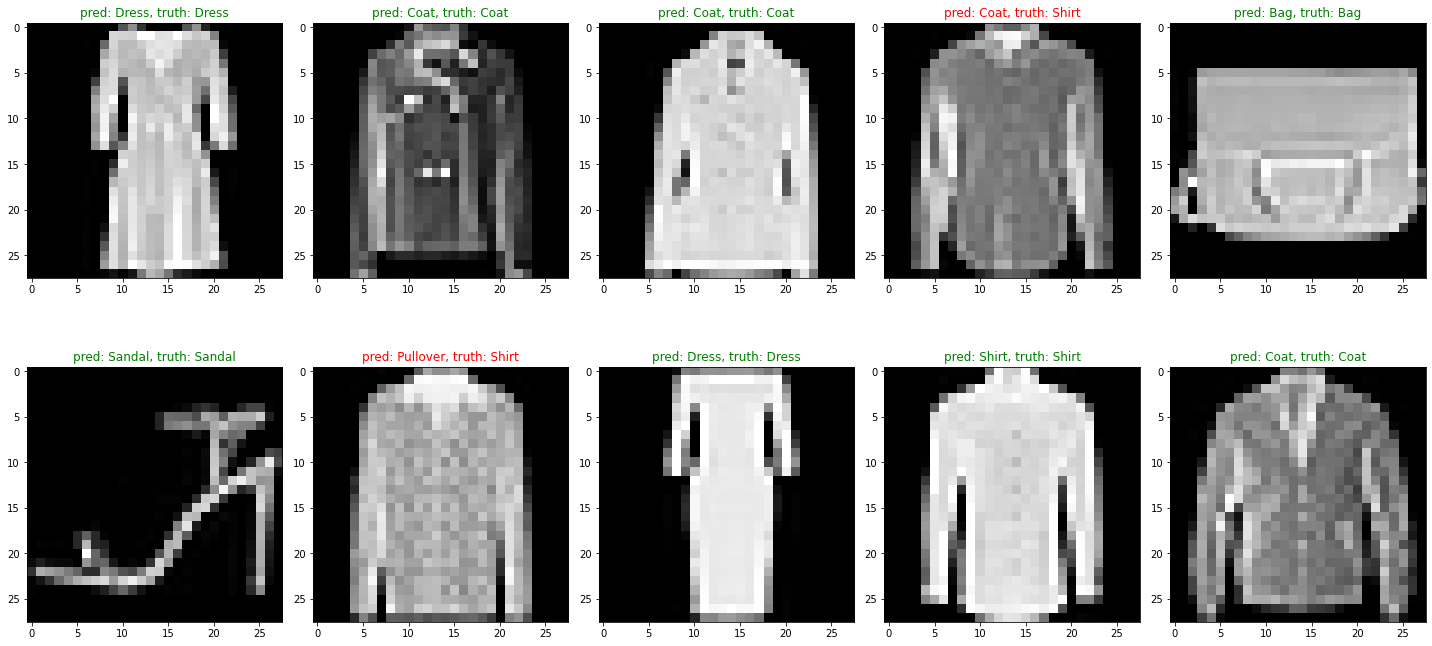

In [400]:
start = 10
plt.figure(figsize=(20,10))
for i,e in enumerate(range(start, start+10)):
    output = model1(xtesttensor[e].unsqueeze(0))
    pred = torch.argmax(output).item()
    truth = torch.argmax(ytesttensor[e]).item()
    plt.subplot(2,5,i+1)
    plt.imshow(xtesttensor[e].squeeze(0), cmap='gray')
    plt.title(f'pred: {labelstring[pred]}, truth: {labelstring[truth]}', color=('green' if pred==truth else 'red'))
plt.tight_layout()

### evaluate the validation score

#### accuracy

In [287]:
predlist = []
truthlist = []
acc = []
correct = 0
for i in range(xtesttensor.shape[0]):
    output = model1(xtesttensor[i].unsqueeze(0))
    pred = torch.argmax(output).item()
    truth = torch.argmax(ytesttensor[i]).item()
    predlist.append(pred)
    truthlist.append(truth)
    
    if pred == truth:
        correct += 1

print(f'accuracy: {correct/xtesttensor.shape[0]}')

accuracy: 0.7704


#### confusion matrix

In [321]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [315]:
confmat = confusion_matrix(truthlist, predlist)

In [322]:
confmat

array([[749,  11,  45,  75,  14,   7,  83,   0,  16,   0],
       [  0, 930,   2,  44,  14,   5,   3,   0,   2,   0],
       [  5,   1, 684,  26, 207,   8,  54,   0,  13,   2],
       [ 39,  60,  17, 792,  65,   1,  19,   0,   7,   0],
       [  1,   1,  96,  69, 762,   1,  54,   0,  16,   0],
       [  3,   0,   2,   1,   0, 949,   4,  21,   3,  17],
       [166,  10, 139,  93, 180,   7, 377,   1,  25,   2],
       [  0,   0,   1,   0,   0, 186,   0, 624,  22, 167],
       [  4,   4,  12,  18,  11,  16,  14,   1, 901,  19],
       [  0,   0,   1,   0,   1,  46,   0,  11,   5, 936]])

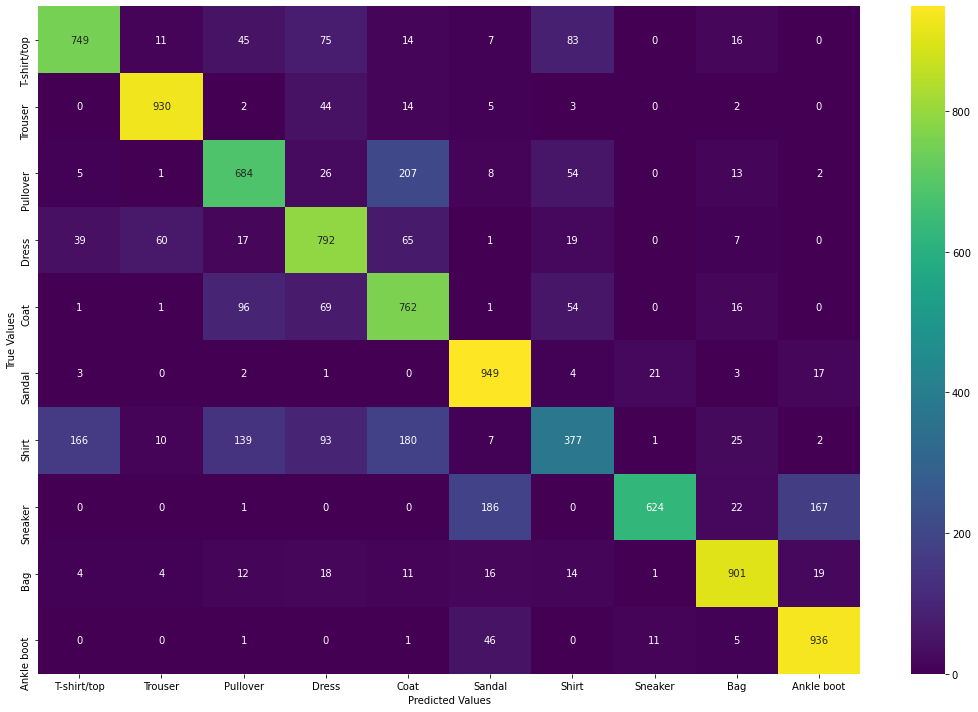

In [327]:
plt.figure(figsize=(15,10))
sns.heatmap(confmat, annot=True, fmt='.0f', cmap='viridis', xticklabels=labelstring, yticklabels=labelstring)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.tight_layout()
plt.show()

the misclassifications mostly seems to make sense. for example, we have many sneakers that are misclassified as ankle boots, and many shirts that are misclassified as t-shirts, pullovers, dresses, coats, etc. However there are some exceptions. There are a few shirts that are predicted as bags, etc. Let's check a few misclassifications

##### keep in mind that the model is extremely simple, with one convolutional layer and the input wasn't even normalized

#### check some of the misclassified items

In [389]:
def check_misclassified(truth, pred):
    indexes = []
    for i in range(xtesttensor.shape[0]):
        if concat[i][0] == truth and concat[i][1] == pred:
            indexes.append(i)

    num_of_images = min(len(indexes), 5)
    plt.figure(figsize=(20,4))
    for i in range(num_of_images):
        choice = np.random.choice(indexes, 1)
        plt.subplot(1, num_of_images, i+1)
        plt.imshow(xtesttensor[choice[0]].squeeze(0), cmap='gray')
        plt.suptitle(f'truth: {labelstring[truth]}, predicted: {labelstring[pred]}')

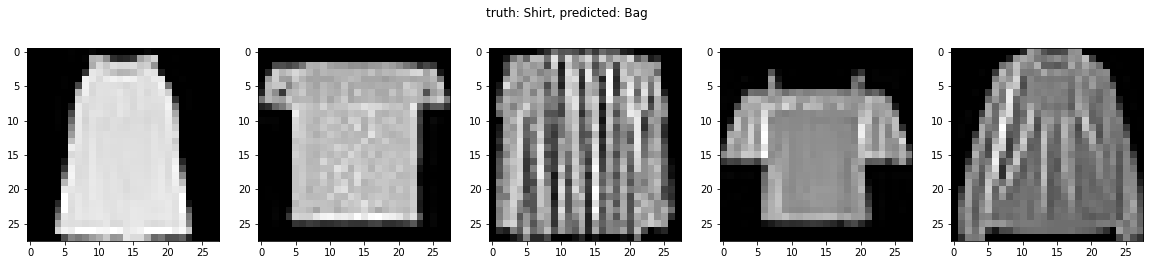

In [390]:
check_misclassified(6,8)

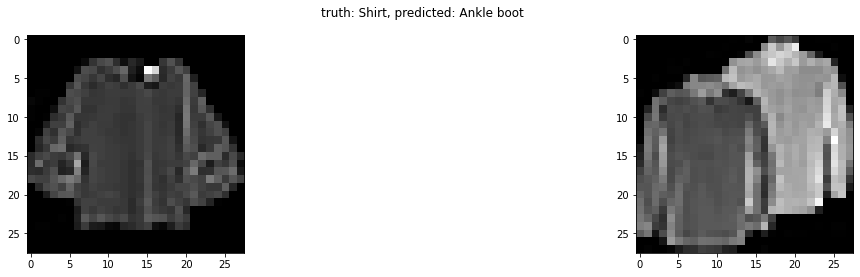

In [391]:
check_misclassified(6,9)

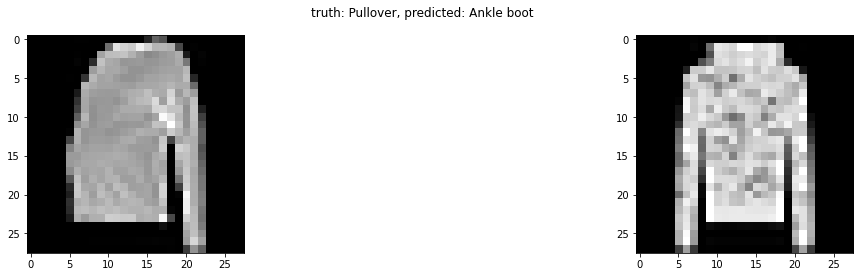

In [392]:
check_misclassified(2,9)

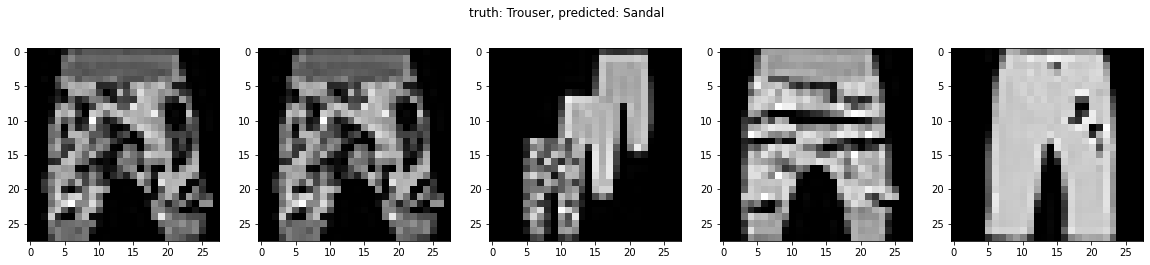

In [397]:
check_misclassified(1,5)

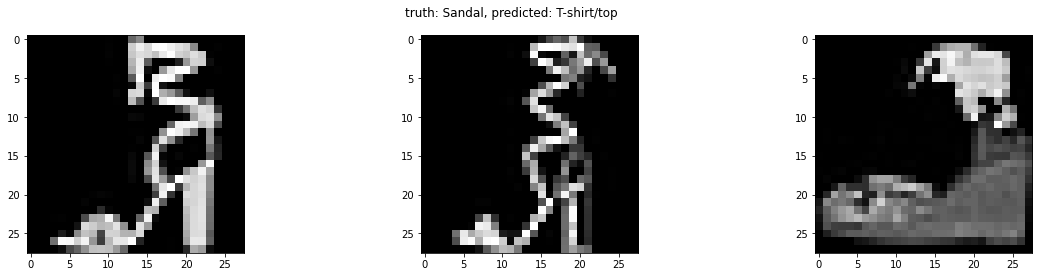

In [402]:
check_misclassified(5,0)